# **To-do list to follow up**

1. **Data Cleansing**:
   - [x] 1.1. Remove unnecessary columns and rows: **There is no unnecessary rows**
   - [x] 1.2. Handle rows or columns with missing values: **No missing values**
   - [x] 1.3. Detect and decide on the method for handling outliers: -

2. **Data Exploration**:

   - [ ] 2.1. Explore and apply various sampling methods.
   - [x] 2.2. Calculate basic statistics.
   - [x] 2.3. Visualize key variables.
   - [x] 2.4. Analyze data patterns and trends and report findings.

3. **Analysis Planning**:
   - [x] 3.1. Create a list of key questions for analysis:
          1. Which ML does result best prediction?
          2. Does the method result stable results for any similar dataset?
          3. What is the target error: 5% (600*0.05=30=RMSE)
   - [x] 3.2. Determine the analysis techniques to apply.
          1. Simple linear
          2. Random forest
          3. Gradiant boosting with LightGBM
          4. FLAML
          5. NN <- Best + Optuna(Done)
   - [x] 3.3. Select tools and software for analysis: **Python + Colab + Libs**

4. **Data Modeling**:
   - [x] 4.1. Write code for model construction.
   - [x] 4.2. Evaluate model performance.
   - [x] 4.3. Tune and optimize the model if necessary:
          Ing with Optuna (Adaptive Learning Rate decay)

5. **Results Interpretation**:
   - [x] 5.1. Interpret model results and draw key conclusions
          1. NN Results best score: MRE=17.73
          2. Similar data points result better prediction
              for Test-data: 17.73
              With part from data: 122.8
          3. ...
   - [x] 5.2. Create tables that clearly present the results.
   - [x] 5.3. Document model limitations and areas for improvement:
          1. Can't reduce the error less than certain point...
          2. Don't know what's in the model though?
          3. Is the model result for different dataset?

6. **Report Writing**:
   - [x] 6.1. Summarize analysis results.
   - [x] 6.2. Write insights and recommendations.
   - [x] 6.3. Decide on report format and perform final review.
          1. Colab + PPT(Slides less than 20p) + Live presentation

7. **Preparing for Presentation**:
   - [~] 7.1. Prepare presentation materials
   - [ ] 7.2. Practice the presentation and prepare for Q&A

# **1. Overview**

This notebook encompasses an analysis of a dataset with four **input variables: 'SigC,' 'SigH,' 'EpsC,' and 'EpsH,'** in order to **predict 'density**.' Each variable consists of 2401 data points, with no missing values. Through exploratory data analysis (EDA), correlation analysis, data visualization, and simple linear regression modeling, we aim to uncover the key patterns and trends within the dataset.

### Libraries import

In [ ]:
import csv
import numpy as np
import pandas as pd
from google.colab import drive
import os
from datetime import datetime

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split

import glob


### Raw data import

In [ ]:
test_data = {'SigC': [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
             'SigH': [0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275],
             'EpsC': [0.4928, 0.4928, 0.4928, 0.657, 0.657, 0.657, 0.8213, 0.8213, 0.8213, 0.4928, 0.4928, 0.4928, 0.657, 0.657, 0.657, 0.8213, 0.8213, 0.8213, 0.4928, 0.4928, 0.4928, 0.657, 0.657, 0.657, 0.8213, 0.8213, 0.8213, 0.4928, 0.4928, 0.4928, 0.657, 0.657, 0.657, 0.8213, 0.8213, 0.8213, 0.4928, 0.4928, 0.4928, 0.657, 0.657, 0.657, 0.8213, 0.8213, 0.8213, 0.4928, 0.4928, 0.4928, 0.657, 0.657, 0.657, 0.8213, 0.8213, 0.8213, 0.4928, 0.4928, 0.4928, 0.657, 0.657, 0.657, 0.8213, 0.8213, 0.8213, 0.4928, 0.4928, 0.4928, 0.657, 0.657, 0.657, 0.8213, 0.8213, 0.8213, 0.4928, 0.4928, 0.4928, 0.657, 0.657, 0.657, 0.8213, 0.8213, 0.8213],
             'EpsH': [0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1, 0.06, 0.08, 0.1],
             'density': [642.084, 652.009, 649.021, 647.106, 651.012, 654.14, 650.585, 653.844, 650.221, 661.982, 672.481, 674.707, 662.98, 671.971, 679.952, 666.019, 673.778, 676.519, 653.387, 667.66, 673.798, 660.041, 666.84, 673.751, 656.968, 668.362, 672.055, 656.717, 663.412, 660.83, 662.052, 663.36, 668.221, 665.419, 669.865, 671.323, 674.892, 679.171, 689.192, 677.516, 684.555, 689.146, 678.577, 688.31, 695.926, 665.926, 673.867, 678.756, 672.146, 676.028, 681.787, 671.312, 677.518, 687.344, 690.869, 690.015, 691.753, 701.071, 704.762, 704.335, 715.574, 718.671, 718.954, 701.114, 712.03, 714.352, 715.038, 720.379, 726.356, 725.971, 735.186, 741.108, 688.124, 698.549, 705.954, 703.109, 706.254, 712.307, 713.023, 718.309, 721.746]}

In [ ]:
data = {'SigC': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.3, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.3, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35], 'SigH': [0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.2275, 0.2275, 0.2275, 0.2275, 0.091, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.091, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.091, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.091, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.091, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.091, 0.1365, 0.1365, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.091, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.0455, 0.0455, 0.091, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.0455, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.091, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.1365, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.182, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.2275, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.273, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185, 0.3185], 'EpsC': [0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.4929, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.1643, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.3286, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.4929, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.3286, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.4929, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.1643, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.3286, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.4929, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.6572, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.8215, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 0.9858, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501, 1.1501], 'EpsH': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.1, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.02, 0.04, 0.1, 0.06, 0.08, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.1, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.1, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.1, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.1, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14], 'density': [634.421, 641.987, 638.865, 640.72, 638.745, 630.802, 639.814, 638.968, 633.104, 640.002, 631.58, 640.634, 636.454, 636.951, 636.031, 639.548, 479.741, 638.596, 639.01, 640.459, 644.386, 630.721, 644.16, 635.734, 638.007, 638.319, 632.855, 628.472, 636.348, 634.283, 641.911, 640.573, 634.216, 639.856, 636.645, 637.272, 642.89, 640.876, 633.697, 640.99, 641.396, 641.372, 640.986, 640.664, 642.195, 644.147, 638.78, 634.956, 642.42, 638.031, 643.046, 640.678, 640.968, 638.434, 634.417, 639.479, 641.117, 635.257, 635.453, 640.61, 642.708, 643.684, 636.189, 641.758, 643.721, 635.928, 638.778, 637.518, 638.713, 641.486, 638.495, 640.786, 637.61, 636.84, 641.549, 643.874, 640.055, 639.771, 637.794, 634.56, 640.757, 635.925, 639.621, 635.945, 637.454, 637.156, 640.008, 642.409, 643.604, 638.846, 639.896, 641.847, 640.851, 639.595, 643.393, 642.112, 639.61, 643.458, 638.986, 640.281, 640.63, 646.154, 647.507, 654.594, 650.583, 640.782, 640.227, 639.774, 644.462, 650.348, 650.676, 651.395, 640.465, 641.474, 649.165, 649.323, 646.168, 650.008, 652.374, 641.696, 643.927, 642.929, 646.075, 647.901, 650.59, 651.803, 639.85, 640.505, 642.89, 648.555, 653.975, 647.239, 651.749, 645.315, 641.12, 646.639, 646.402, 644.203, 651.056, 653.483, 636.16, 641.781, 642.187, 649.118, 649.727, 655.13, 652.651, 646.846, 648.755, 659.493, 670.844, 675.375, 683.329, 689.868, 646.513, 657.206, 659.805, 663.768, 673.474, 680.443, 687.173, 650.294, 653.313, 659.095, 668.616, 675.607, 680.54, 687.268, 650.669, 651.057, 663.9, 669.204, 675.872, 684.604, 689.713, 646.75, 656.224, 662.298, 668.52, 676.012, 679.209, 688.714, 647.064, 653.478, 665.059, 670.275, 675.578, 681.5, 691.086, 642.613, 658.569, 660.66, 670.229, 674.873, 682.431, 690.056, 643.05, 648.703, 655.059, 661.582, 639.885, 671.789, 680.43, 688.044, 647.554, 644.888, 659.186, 663.812, 670.33, 677.132, 687.005, 643.233, 648.926, 655.057, 668.001, 671.773, 681.518, 686.487, 640.838, 651.043, 654.949, 660.462, 670.396, 678.524, 688.108, 638.138, 648.701, 655.916, 659.823, 672.887, 678.079, 687.523, 642.537, 648.084, 653.941, 663.813, 671.841, 679.383, 685.613, 638.509, 650.061, 658.233, 661.569, 669.645, 677.733, 685.498, 10.9892, 8.15659, 7.14378, 6.36324, 5.92817, 446.143, 446.143, 11.2417, 7.90757, 7.13784, 6.31181, 5.89994, 446.143, 446.143, 10.3739, 8.13203, 8.40756, 6.3481, 14.7691, 446.143, 446.143, 10.9938, 8.01649, 6.99739, 6.29828, 10.8405, 446.143, 446.143, 16.8203, 8.0165, 7.02802, 8.53177, 5.89123, 446.143, 446.143, 11.0597, 8.08158, 7.01884, 6.32103, 5.87461, 446.143, 446.143, 11.4289, 8.03464, 8.67188, 6.30258, 5.92112, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 643.841, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 641.703, 637.703, 639.577, 638.526, 642.626, 639.675, 635.945, 638.019, 640.355, 643.267, 638.558, 640.864, 638.018, 641.364, 642.162, 637.144, 637.573, 642.477, 644.509, 640.479, 643.599, 640.259, 636.332, 640.765, 630.405, 637.898, 639.015, 641.129, 640.545, 639.624, 643.111, 638.493, 637.579, 641.578, 639.999, 634.822, 632.919, 639.68, 638.288, 640.342, 643.74, 637.541, 633.543, 642.706, 636.369, 643.897, 643.656, 639.898, 641.684, 631.868, 635.728, 635.587, 640.197, 634.676, 642.498, 634.039, 643.476, 635.387, 633.882, 639.972, 643.326, 639.927, 634.48, 640.439, 639.659, 640.372, 641.75, 639.592, 639.879, 643.936, 641.33, 637.568, 645.17, 641.102, 641.576, 641.854, 636.493, 643.986, 642.813, 635.438, 637.083, 635.015, 637.359, 635.708, 635.326, 640.087, 644.667, 645.118, 642.349, 640.784, 637.555, 634.404, 637.288, 640.542, 636.201, 639.903, 642.45, 639.099, 643.208, 645.17, 648.573, 647.03, 653.653, 636.105, 639.297, 646.37, 650.463, 650.301, 651.262, 652.75, 640.831, 638.812, 648.75, 643.442, 644.918, 651.062, 648.905, 641.353, 643.952, 645.528, 641.53, 652.362, 647.469, 649.99, 638.115, 643.335, 646.285, 651.429, 651.298, 649.77, 657.144, 644.934, 637.775, 642.991, 648.183, 647.668, 658.736, 650.501, 646.019, 642.365, 641.19, 647.57, 653.477, 648.906, 655.098, 643.247, 656.885, 662.375, 671.445, 676.678, 681.606, 688.672, 644.953, 655.385, 667.989, 669.133, 678.354, 683.503, 685.473, 653.458, 652.704, 658.241, 668.483, 674.672, 681.962, 687.974, 647.14, 657.036, 658.541, 671.9, 675.39, 679.987, 685.499, 638.559, 655.424, 666.12, 670.251, 673.743, 683.621, 689.548, 651.294, 655.047, 662.02, 667.948, 675.002, 683.329, 691.19, 651.053, 654.295, 662.641, 666.582, 676.15, 680.347, 687.564, 645.564, 650.358, 657.126, 664.664, 672.188, 678.407, 685.179, 641.276, 649.918, 655.397, 662.141, 673.17, 677.916, 688.757, 639.822, 650.673, 657.484, 662.27, 669.532, 678.669, 688.752, 640.257, 651.825, 654.708, 663.447, 673.26, 679.902, 687.78, 642.534, 649.098, 657.175, 663.411, 672.361, 678.393, 686.306, 645.436, 649.459, 656.214, 661.934, 670.117, 679.651, 687.379, 642.153, 643.961, 657.473, 662.891, 672.506, 678.551, 688.216, 10.6858, 8.16055, 7.16012, 6.30772, 5.92149, 446.143, 446.143, 10.8802, 8.17698, 7.14511, 6.30737, 15.7309, 446.143, 446.143, 11.2756, 8.03567, 7.10461, 6.33812, 5.86685, 446.143, 446.143, 10.9664, 8.08232, 7.10007, 6.35661, 6.48815, 446.143, 446.143, 11.4992, 8.05432, 6.89798, 6.35534, 5.82549, 446.143, 446.143, 10.961, 8.08171, 7.08735, 6.30846, 5.87127, 446.143, 446.143, 10.6514, 8.13354, 7.05879, 6.39158, 13.7907, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 639.883, 641.311, 634.048, 639.244, 644.659, 645.021, 639.775, 640.265, 637.801, 637.615, 645.83, 639.588, 642.687, 642.719, 634.093, 636.466, 644.6, 640.589, 637.228, 644.092, 638.206, 644.403, 642.964, 644.823, 642.137, 643.657, 642.301, 643.562, 643.563, 646.022, 646.035, 645.543, 642.91, 644.355, 640.164, 644.312, 645.855, 645.489, 638.956, 643.493, 643.84, 645.646, 647.552, 643.115, 646.552, 643.733, 645.195, 644.524, 646.266, 640.278, 640.792, 637.195, 633.641, 631.312, 638.189, 643.528, 637.418, 644.668, 642.915, 638.914, 644.643, 641.711, 642.852, 641.426, 638.425, 638.12, 640.914, 641.641, 643.863, 639.595, 647.641, 642.762, 641.767, 642.121, 635.514, 641.984, 643.262, 640.059, 646.462, 641.335, 641.268, 643.304, 644.137, 642.804, 650.03, 645.032, 645.456, 642.505, 646.88, 645.601, 647.627, 646.275, 644.084, 648.183, 644.516, 646.129, 648.188, 645.138, 641.049, 643.004, 644.402, 643.762, 652.159, 645.518, 655.915, 639.92, 644.064, 646.635, 648.095, 647.174, 652.707, 652.719, 647.233, 646.877, 643.91, 653.443, 647.892, 653.803, 654.89, 635.159, 650.468, 645.021, 644.642, 647.482, 648.149, 652.877, 655.31, 646.809, 645.744, 646.394, 650.878, 652.6, 652.179, 656.58, 650.535, 650.301, 640.904, 653.153, 651.487, 660.661, 658.668, 648.589, 646.856, 649.73, 651.46, 650.359, 659.693, 658.954, 648.678, 654.599, 664.491, 667.118, 672.583, 683.251, 687.918, 646.183, 654.169, 666.888, 666.323, 672.692, 686.368, 690.656, 651.678, 656.128, 660.137, 669.773, 677.2, 684.79, 692.684, 651.153, 658.571, 665.038, 674.438, 678.908, 683.503, 686.94, 650.766, 657.412, 663.22, 669.486, 679.463, 687.459, 694.643, 652.683, 659.932, 668.935, 672.238, 680.226, 687.943, 691.43, 652.287, 661.015, 665.191, 674.054, 680.278, 688.735, 694.757, 644.299, 651.868, 657.704, 662.458, 673.162, 679.932, 685.901, 642.119, 649.711, 654.909, 665.185, 673.618, 680.53, 687.838, 642.947, 649.476, 658.508, 665.746, 673.962, 680.658, 686.756, 642.415, 650.947, 657.654, 664.907, 673.769, 649.687, 679.029, 687.174, 646.056, 650.782, 658.074, 664.484, 675.852, 682.232, 688.277, 646.396, 652.052, 659.339, 664.412, 675.961, 683.512, 689.855, 648.735, 655.898, 659.194, 667.375, 675.583, 682.363, 690.527, 10.7387, 8.19338, 7.20154, 6.26301, 16.4171, 446.143, 446.143, 17.6031, 8.01445, 7.07514, 6.32989, 5.91026, 446.143, 446.143, 15.9651, 8.2087, 7.16673, 6.33688, 11.5228, 446.143, 446.143, 11.0828, 8.27835, 7.07022, 6.32085, 5.97475, 446.143, 446.143, 11.372, 8.07669, 7.3023, 6.37346, 8.85012, 446.143, 446.143, 11.6611, 8.20769, 7.27106, 6.37222, 6.57449, 446.143, 446.143, 11.9296, 8.19382, 7.50593, 6.31988, 6.07972, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 646.387, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 644.169, 643.245, 645.362, 644.429, 644.093, 641.072, 644.815, 648.237, 646.462, 645.057, 646.534, 648.218, 645.093, 649.015, 658.162, 653.743, 649.203, 653.638, 650.723, 651.703, 655.655, 652.295, 656.083, 656.295, 660.959, 662.518, 655.707, 657.59, 660.878, 662.133, 661.791, 664.374, 659.52, 659.004, 665.175, 665.335, 663.547, 666.683, 660.766, 665.77, 667.704, 662.949, 668.823, 669.855, 670.923, 672.93, 668.662, 670.381, 669.856, 639.978, 642.325, 642.715, 646.886, 644.201, 647.68, 652.574, 650.468, 651.996, 653.998, 649.044, 652.803, 648.431, 651.608, 654.637, 653.153, 651.886, 657.452, 660.388, 660.601, 658.029, 652.909, 656.295, 652.472, 654.452, 661.259, 660.46, 663.673, 659.965, 663.282, 663.387, 664.259, 664.291, 666.129, 667.47, 667.129, 662.428, 665.233, 665.473, 670.875, 671.066, 668.215, 672.234, 672.058, 670.509, 668.208, 643.774, 649.318, 646.364, 652.227, 646.463, 657.006, 654.996, 647.81, 654.441, 654.272, 657.649, 656.571, 657.111, 661.651, 659.245, 653.741, 659.573, 660.734, 664.793, 661.267, 662.608, 660.893, 659.031, 664.077, 663.543, 668.733, 666.962, 671.229, 663.241, 670.294, 665.266, 669.908, 672.483, 669.602, 674.72, 666.242, 669.884, 672.355, 670.901, 677.526, 679.042, 673.642, 671.806, 670.517, 673.057, 674.603, 679.715, 680.587, 679.555, 656.764, 660.522, 664.675, 672.602, 679.262, 685.528, 694.905, 659.13, 659.947, 670.658, 675.001, 680.381, 687.412, 698.36, 660.737, 669.253, 671.49, 677.204, 684.161, 691.184, 699.471, 667.256, 668.377, 677.234, 679.978, 688.931, 695.564, 701.864, 667.763, 671.483, 682.512, 685.899, 694.764, 700.581, 704.49, 669.21, 680.399, 687.368, 689.607, 698.648, 704.433, 708.859, 676.627, 684.443, 688.197, 695.379, 701.993, 706.186, 712.156, 642.746, 650.438, 661.341, 666.532, 673.51, 680.752, 690.691, 648.631, 655.807, 663.205, 669.932, 674.489, 684.219, 692.396, 649.125, 658.818, 664.068, 673.903, 679.671, 687.091, 695.029, 658.537, 665.147, 671.126, 677.811, 684.429, 692.493, 698.013, 663.985, 665.83, 673.093, 681.252, 685.858, 692.998, 699.866, 667.09, 668.173, 676.839, 682.588, 687.939, 695.413, 704.12, 667.542, 675.785, 678.977, 687.904, 694.123, 698.334, 704.94, 11.0655, 8.23742, 7.096, 6.28795, 6.00626, 446.143, 446.143, 11.9362, 8.3446, 7.09318, 6.49755, 11.6697, 446.143, 446.143, 12.0142, 8.39819, 7.24809, 6.3625, 4.60708, 446.143, 446.143, 13.1997, 8.48131, 7.24877, 6.44194, 9.67391, 446.143, 446.143, 13.2801, 8.41978, 7.42662, 6.49783, 6.12299, 446.143, 446.143, 13.667, 8.57414, 7.46797, 6.54639, 6.0485, 446.143, 446.143, 49.7362, 8.55467, 7.33116, 8.16571, 6.05178, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 652.8, 652.055, 655.43, 651.047, 660.254, 655.199, 650.258, 677.426, 674.275, 668.995, 672.093, 671.523, 668.178, 671.551, 683.342, 683.811, 683.715, 686.697, 683.547, 685.096, 685.473, 696.069, 699.024, 697.384, 699.671, 700.885, 699.143, 700.453, 711.617, 708.373, 710.258, 709.822, 710.939, 711.094, 707.456, 722.481, 721.779, 724.716, 724.205, 723.16, 724.061, 723.644, 734.565, 733.721, 735.471, 732.716, 731.913, 737.946, 732.042, 653.628, 655.539, 656.919, 657.475, 657.415, 656.141, 658.72, 673.362, 668.239, 671.981, 670.022, 672.034, 671.418, 671.562, 687.953, 685.287, 684.793, 681.901, 685.183, 686.225, 685.42, 698.701, 699.639, 697.434, 700.794, 698.357, 699.568, 698.28, 714.375, 710.177, 707.851, 711.395, 713.912, 709.431, 712.677, 723.719, 726.065, 722.006, 724.72, 721.564, 721.758, 723.475, 734.789, 734.064, 736.97, 737.691, 734.173, 732.226, 735.202, 661.047, 659.348, 658.915, 662.301, 668.639, 668.696, 665.754, 674.221, 675.205, 670.746, 678.548, 675.147, 680.07, 683.715, 685.993, 688.419, 691.905, 689.893, 695.143, 692.864, 694.317, 699.157, 700.57, 702.323, 705.37, 702.731, 707.953, 706.291, 710.587, 714.321, 717.079, 719.23, 715.981, 717.254, 721.162, 722.173, 727.412, 726.737, 729.75, 729.605, 731.909, 730.674, 732.552, 737.006, 734.809, 739.412, 740.449, 682.97, 743.059, 744.587, 663.434, 667.749, 679.223, 685.821, 688.51, 695.522, 701.944, 678.059, 681.798, 690.543, 696.104, 701.919, 706.177, 714.351, 694.318, 698.868, 703.436, 706.275, 712.014, 720.54, 724.549, 542.887, 708.873, 716.868, 722.851, 724.469, 731.166, 735.952, 718.625, 723.809, 725.311, 731.954, 738.196, 741.9, 747.61, 729.964, 733.541, 737.57, 744.56, 749.787, 753.675, 758.912, 740.295, 743.419, 749.079, 754.587, 757.836, 761.571, 769.359, 661.074, 666.008, 667.083, 676.259, 682.525, 690.894, 697.59, 673.896, 673.599, 680.315, 687.362, 692.714, 699.106, 705.677, 684.893, 688.301, 692.181, 700.265, 703.516, 710.302, 716.204, 696.888, 699.985, 702.659, 709.382, 713.835, 720.121, 723.225, 710.34, 711.114, 716.177, 718.913, 722.493, 727.781, 731.617, 719.865, 720.115, 724.011, 727.023, 733.1, 737.378, 740.891, 730.279, 732.216, 734.729, 736.808, 741.704, 745.403, 749.766, 717.763, 12.1273, 8.34715, 7.21433, 6.44834, 5.9559, 446.143, 446.143, 566.928, 8.61247, 7.48393, 6.63538, 6.11228, 446.143, 446.143, 585.353, 9.27234, 7.70296, 6.78065, 7.63428, 446.143, 446.143, 601.417, 9.75861, 7.91689, 6.84948, 6.31643, 446.143, 446.143, 617.231, 10.2212, 8.20872, 8.36157, 6.4929, 446.143, 446.143, 629.306, 11.5697, 8.61968, 7.21615, 6.67443, 446.143, 446.143, 641.746, 13.2798, 9.09145, 7.38699, 6.61044, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 683.08, 680.185, 746.293, 680.408, 684.884, 682.553, 681.913, 680.491, 713.691, 718.593, 712.832, 718.358, 715.968, 717.729, 715.332, 744.158, 742.031, 744.552, 745.804, 743.337, 746.075, 743.868, 770.669, 771.397, 771.844, 770.99, 772.866, 772.536, 769.765, 795.403, 793.169, 793.126, 793.383, 793.896, 790.473, 795.906, 815.81, 814.95, 814.11, 816.635, 813.664, 817.023, 816.839, 833.12, 830.994, 833.421, 834.336, 831.606, 835.532, 832.032, 682.7, 680.948, 684.806, 683.876, 683.695, 680.325, 714.289, 714.097, 717.778, 715.206, 718.478, 713.311, 743.257, 746.287, 746.097, 747.722, 746.75, 748.244, 771.265, 772.048, 773.51, 774.065, 769.128, 773.042, 772.778, 792.856, 794.766, 795.154, 794.441, 792.762, 795.431, 793.67, 815.025, 815.311, 816.302, 814.661, 817.054, 814.423, 815.048, 833.215, 833.545, 834.695, 832.574, 833.108, 577.112, 834.8, 685.071, 685.764, 686.633, 689.926, 689.999, 693.096, 695.243, 717.554, 717.306, 718.635, 717.432, 722.658, 721.368, 539.31, 746.322, 746.272, 750.67, 747.526, 750.077, 752.48, 754.482, 771.465, 770.19, 775.836, 773.086, 774.347, 775.874, 780.626, 792.501, 796.486, 799.539, 799.482, 799.213, 801.876, 801.682, 813.303, 817.702, 817.933, 819.994, 644.397, 822.792, 823.651, 833.111, 580.637, 838.285, 837.12, 838.229, 838.345, 837.277, 690.97, 695.814, 697.222, 705.371, 710.808, 714.434, 724.207, 721.63, 728.025, 731.957, 739.789, 742.172, 744.201, 751.86, 747.286, 751.924, 756.512, 764.329, 766.66, 772.382, 775.162, 776.044, 780.446, 782.396, 789.688, 791.134, 795.202, 799.164, 796.407, 803.46, 805.799, 809.009, 813.532, 817.336, 820.606, 815.103, 821.581, 825.468, 574.961, 834.055, 835.302, 838.29, 837.725, 841.84, 843.217, 845.265, 848.665, 855.201, 856.881, 682.422, 683.097, 687.082, 695.679, 699.695, 705.823, 714.202, 712.471, 715.349, 717.539, 721.264, 726.643, 733.225, 736.273, 743.115, 743.441, 744.935, 748.608, 750.844, 754.367, 757.846, 763.829, 764.533, 768.908, 769.718, 771.307, 774.024, 777.791, 788.655, 789.307, 788.571, 788.243, 790.665, 792.083, 793.56, 809.056, 805.076, 806.307, 809.683, 807.49, 810.497, 810.563, 827.187, 824.395, 823.477, 823.688, 824.706, 823.503, 825.637, 579.89, 9.0614, 7.66985, 6.54523, 6.11352, 446.143, 446.143, 622.886, 10.7757, 8.36953, 7.1164, 6.54167, 446.143, 446.143, 654.453, 616.737, 9.50124, 7.75849, 6.90781, 446.143, 446.143, 680.266, 645.397, 13.0248, 8.5179, 7.51721, 446.143, 446.143, 701.464, 669.851, 648.674, 9.84344, 7.94063, 446.143, 446.143, 724.301, 689.058, 669.935, 23.3692, 8.93043, 446.143, 446.143, 743.347, 707.523, 686.151, 670.735, 11.9765, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 716.577, 709.856, 712.905, 713.236, 707.469, 712.216, 712.839, 760.576, 758.814, 762.754, 761.104, 763.07, 759.581, 762.283, 794.72, 793.392, 797.105, 797.218, 794.83, 795.674, 795.463, 821.86, 820.473, 824.329, 822.39, 825.075, 821.784, 818.182, 843.428, 846.426, 840.867, 843.598, 846.506, 843.945, 843.717, 863.914, 608.945, 859.658, 864.772, 861.456, 863.828, 865.934, 880.855, 878.231, 878.54, 881.258, 875.793, 877.646, 881.233, 714.778, 713.389, 710.614, 715.46, 710.588, 714.795, 712.577, 764.069, 758.083, 765.469, 760.814, 760.903, 760.053, 766.488, 798.844, 794.943, 799.257, 796.363, 794.789, 795.461, 797.505, 821.164, 823.426, 823.16, 821.036, 818.74, 818.859, 825.401, 842.417, 843.698, 844.816, 846.313, 843.451, 842.424, 844.607, 864.547, 859.981, 562.153, 862.113, 861.919, 863.718, 859.42, 879.771, 878.368, 881.366, 879.914, 879.406, 881.987, 881.921, 710.792, 716.966, 714.934, 715.334, 718.916, 719.429, 720.052, 761.919, 764.82, 765.401, 765.068, 765.196, 763.806, 765.53, 799.058, 798.56, 798.383, 801.288, 799.642, 798.31, 799.956, 821.796, 822.691, 822.615, 823.782, 828.619, 828.146, 823.323, 843.41, 844.105, 845.553, 845.247, 601.969, 850.608, 849.582, 860.718, 862.888, 865.067, 864.137, 866.952, 868.942, 865.996, 879.575, 877.305, 879.102, 882.837, 881.188, 885.693, 883.696, 717.622, 723.248, 726.717, 731.552, 735.954, 742.212, 746.397, 764.853, 768.682, 773.736, 776.963, 778.61, 780.56, 785.773, 799.647, 799.989, 809.433, 805.112, 812.974, 817.156, 819.86, 819.076, 824.369, 829.536, 832.822, 837.502, 839.458, 842.349, 553.057, 849.531, 854.899, 857.284, 855.497, 862.313, 861.076, 862.454, 864.234, 564.774, 873.245, 873.669, 878.438, 874.507, 881.731, 884.912, 885.663, 886.634, 889.579, 887.576, 893.774, 708.677, 713.969, 716.366, 719.822, 725.341, 730.535, 732.167, 759.448, 757.882, 758.719, 761.384, 764.036, 768.144, 768.819, 790.859, 795.377, 789.171, 793.786, 794.297, 797.363, 798.997, 816.71, 818.201, 819.392, 817.255, 819.472, 819.321, 820.546, 837.334, 838.214, 833.924, 837.637, 835.528, 839.067, 838.065, 859.693, 855.328, 851.233, 851.476, 853.727, 852.863, 852.385, 875.343, 871.857, 870.51, 867.18, 864.663, 865.558, 863.569, 626.071, 16.2028, 8.18815, 7.06646, 6.54638, 446.143, 446.143, 680.303, 650.096, 14.4048, 8.78809, 7.42619, 446.143, 446.143, 720.622, 689.405, 668.901, 40.1508, 7.1578, 446.143, 446.143, 749.956, 720.533, 701.533, 686.666, 662.707, 446.143, 446.143, 777.014, 740.958, 721.634, 707.176, 700.288, 446.143, 446.143, 794.639, 762.336, 739.799, 725.923, 719.45, 446.143, 446.143, 808.923, 777.505, 754.32, 741.26, 730.309, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143, 446.143]}

### Into Dataframe

In [ ]:
import pandas as pd

data = pd.DataFrame(data)
test_data = pd.DataFrame(test_data)

### See datas in DF

In [ ]:
print(data)

      SigC    SigH    EpsC  EpsH  density
0     0.05  0.0455  0.1643  0.02  634.421
1     0.05  0.0455  0.1643  0.04  641.987
2     0.05  0.0455  0.1643  0.06  638.865
3     0.05  0.0455  0.1643  0.08  640.720
4     0.05  0.0455  0.1643  0.10  638.745
...    ...     ...     ...   ...      ...
2396  0.35  0.3185  1.1501  0.06  446.143
2397  0.35  0.3185  1.1501  0.08  446.143
2398  0.35  0.3185  1.1501  0.10  446.143
2399  0.35  0.3185  1.1501  0.12  446.143
2400  0.35  0.3185  1.1501  0.14  446.143

[2401 rows x 5 columns]


In [ ]:
print(test_data)

    SigC    SigH    EpsC  EpsH  density
0   0.15  0.1365  0.4928  0.06  642.084
1   0.15  0.1365  0.4928  0.08  652.009
2   0.15  0.1365  0.4928  0.10  649.021
3   0.15  0.1365  0.6570  0.06  647.106
4   0.15  0.1365  0.6570  0.08  651.012
..   ...     ...     ...   ...      ...
76  0.25  0.2275  0.6570  0.08  706.254
77  0.25  0.2275  0.6570  0.10  712.307
78  0.25  0.2275  0.8213  0.06  713.023
79  0.25  0.2275  0.8213  0.08  718.309
80  0.25  0.2275  0.8213  0.10  721.746

[81 rows x 5 columns]


In [ ]:
import numpy as np
import sklearn

# **2.EDA**
- More explanation would be kind

## **2.1. Basic Statistics**

In [ ]:
data.describe()

,SigC,SigH,EpsC,EpsH,density
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,0.200000,0.182000,0.657200,0.080000,596.636791
std,0.100021,0.091019,0.328668,0.040008,209.194939
min,0.050000,0.045500,0.164300,0.020000,4.607080
25%,0.100000,0.091000,0.328600,0.040000,446.143000
50%,0.200000,0.182000,0.657200,0.080000,653.313000
75%,0.300000,0.273000,0.985800,0.120000,705.370000
max,0.350000,0.318500,1.150100,0.140000,893.774000


## **2.2. Correlation**

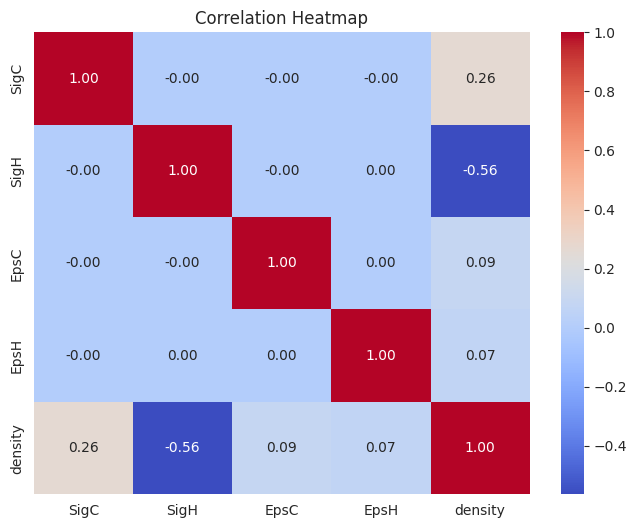

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

- **SigH and Density**: SigH exhibits a strong negative correlation (-0.56) with Density, indicating that as SigH values increase, there is a tendency for Density values to decrease. In practice, it was observed that higher SigH values are associated with more frequent outliers in lower Density ranges.

- **SigC and Density**: SigC has a positive correlation (0.26) with Density, but this correlation is weaker compared to the relationship between SigH and Density. The influence of SigC on Density may not be as pronounced as SigH.

- **EpsC and EpsH**: Both EpsC and EpsH show relatively weak correlations with Density. This suggests that these variables may have less direct importance in predicting Density.

## **2.3. Outliars**

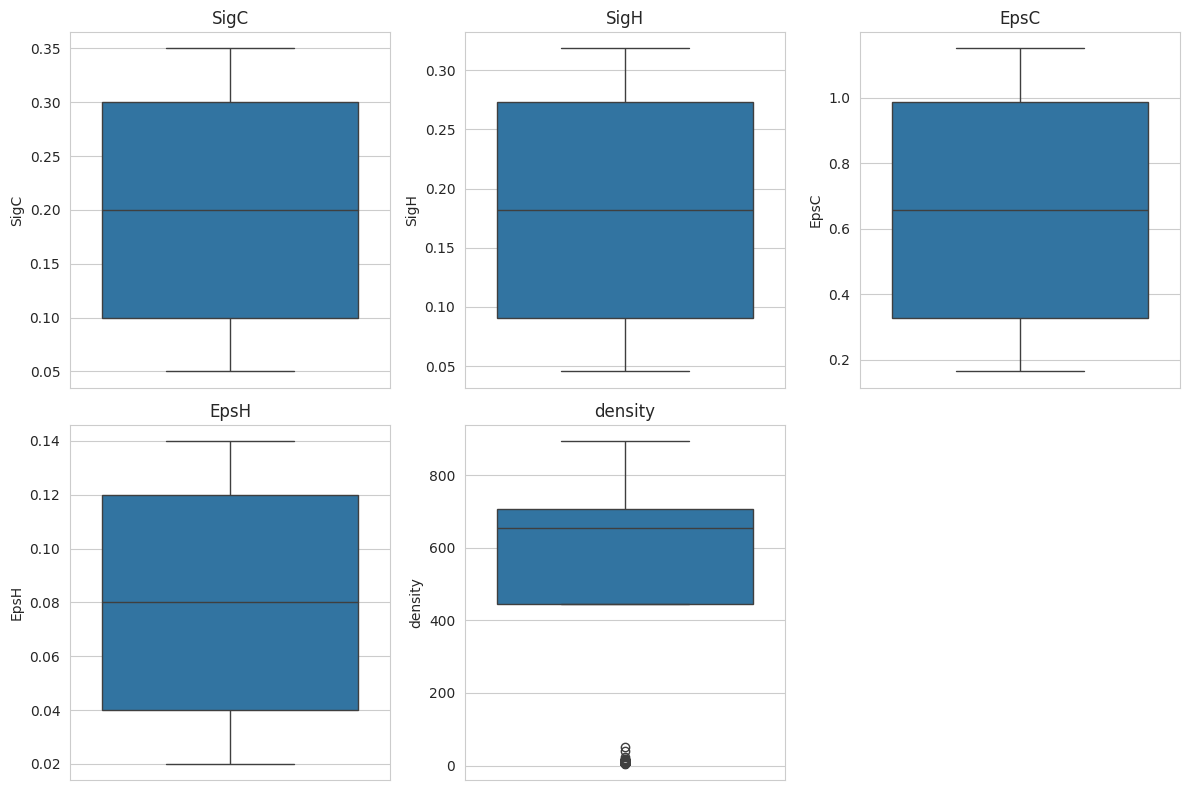

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots and palette
sns.set_style("whitegrid")
sns.color_palette("Set1")

# Plotting boxplots for each variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

- **SigC, SigH, EpsC, EpsH**: These variables generally exhibit a uniform distribution and there are no clear outliers.
- **density**: there are a few outliers. These outliers are primarily concentrated at lower values.

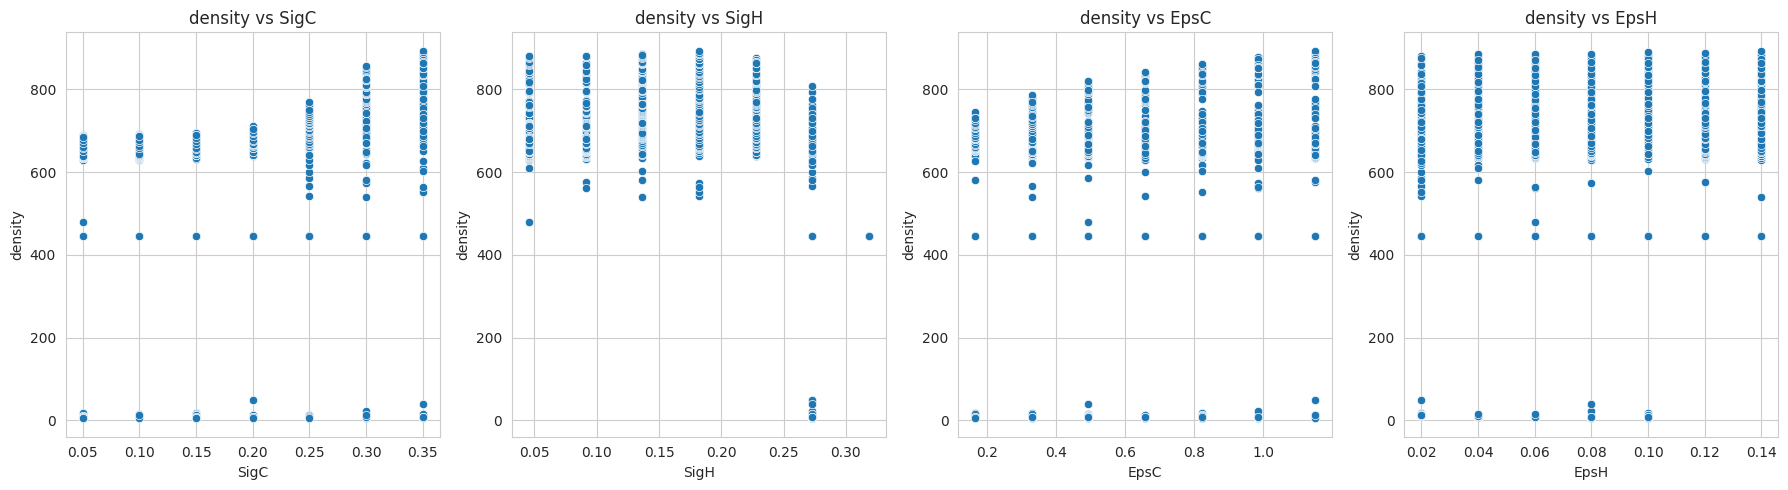

In [ ]:
plt.figure(figsize=(18, 5))

# Scatter plot for each variable against density
for i, column in enumerate(['SigC', 'SigH', 'EpsC', 'EpsH']):
    plt.subplot(1, 4, i + 1)
    sns.scatterplot(x=data[column], y=data['density'])
    plt.title(f'density vs {column}')

plt.tight_layout()
plt.show()


The outliers in the Density variable are mostly concentrated at lower values. These outliers occur more frequently, especially when SigH has high values. This suggests that Density may decrease sharply when SigH increases beyond a certain range.

In [ ]:
# Calculate IQR for density
Q1 = data['density'].quantile(0.25)
Q3 = data['density'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those outside of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

# Extracting outliers
outliers = data[(data['density'] < outlier_threshold_low) | (data['density'] > outlier_threshold_high)]

# Checking the properties of these outliers
outliers.describe()


,SigC,SigH,EpsC,EpsH,density
count,197.000000,1.970000e+02,197.000000,197.000000,197.000000
mean,0.170558,2.730000e-01,0.626342,0.063858,8.853794
std,0.088041,5.565258e-17,0.331531,0.027504,4.575125
min,0.050000,2.730000e-01,0.164300,0.020000,4.607080
25%,0.100000,2.730000e-01,0.328600,0.040000,6.541670
50%,0.150000,2.730000e-01,0.657200,0.060000,7.758490
75%,0.250000,2.730000e-01,0.985800,0.080000,9.501240
max,0.350000,2.730000e-01,1.150100,0.100000,49.736200


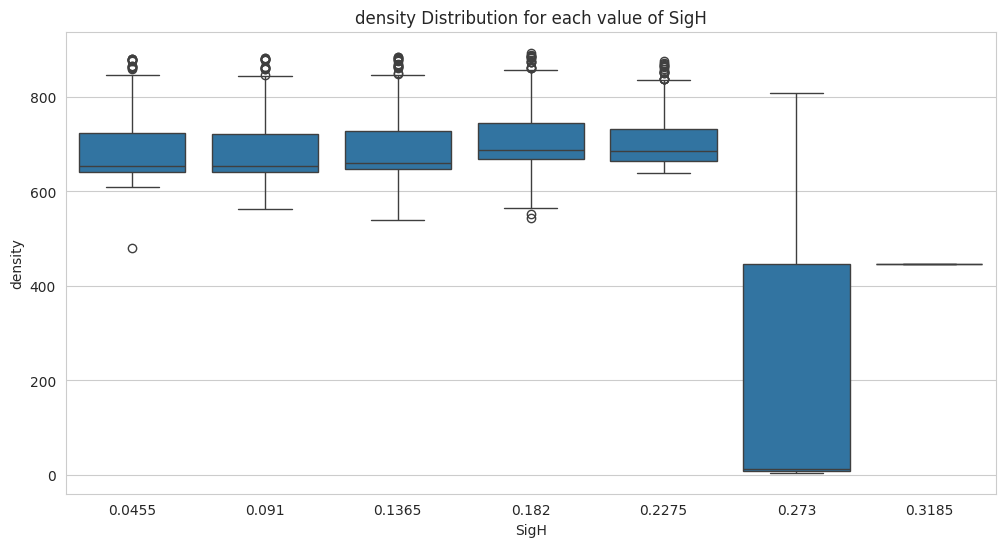

In [ ]:
# Analyzing the distribution of Density for each value of SigH
plt.figure(figsize=(12, 6))
sns.boxplot(x='SigH', y='density', data=data)
plt.title('density Distribution for each value of SigH')
plt.show()

In data points that include outliers, the value of SigH consistently appears to be 0.27. This suggests a high likelihood of outliers in Density occurring when SigH is at this specific value. For other variables (SigC, EpsC, EpsH), while there is some variation in distribution, they do not exhibit as clear a pattern as SigH.

Based on this information, it can be inferred that outliers in Density may be specifically related to SigH.

# **3. Simple regression models**

## **3.1. Linear regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparing the data
X = data.drop('density', axis=1)
y = data['density']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
rmse_linr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_linr = r2_score(y_test, y_pred)

rmse_linr, r2_linr

(170.4117090093512, 0.3867969820171311)

- **Feature Engineering**:
    - Additional feature transformations can be considered. For instance, adding squared terms or interaction terms of variables to capture nonlinear relationships.
    - Adjusting the scaling of the data can also improve the model's performance.

In [ ]:
X_train_ext = X_train.copy()

for col in X_train.columns:
    X_train_ext[col+'_squared'] = X_train[col]**2

X_test_ext = X_test.copy()
for col in X_train.columns:
    X_test_ext[col+'_squared'] = X_test[col]**2

# Split date into train-test test
# X_train_ext, X_test_ext, y_train, y_test = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# train with new feature
model_ext = LinearRegression()
model_ext.fit(X_train_ext, y_train)

# prediction with new model
y_pred_ext = model_ext.predict(X_test_ext)

# evaluation of new model
rmse_linr_ext = np.sqrt(mean_squared_error(y_test, y_pred_ext))
r2_linr_ext = r2_score(y_test, y_pred_ext)

rmse_linr_ext, r2_linr_ext

(157.7174833266655, 0.4747511661675665)

## **3.2. Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# creation of pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=8), LinearRegression())

# model training
poly_model.fit(X_train, y_train)

# prediction for new test data
y_pred_poly = poly_model.predict(X_test)

# evaluation of new model
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

rmse_poly, r2_poly

(51.55593267614875, 0.9438741778600539)

# **4. Advanced ML models**

## **4.1. RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# creation and training of a random forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_ext, y_train)

# prediction with model
y_pred_rf = rf_model.predict(X_test_ext)

# evaluation of new model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf

(52.86916779614436, 0.9409784828998036)

## **4.2. Gradient Boosting**

In [ ]:
from lightgbm import LGBMRegressor

# creation and training of LightGBM Regression model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train_ext, y_train)

# Prediction of LightGBM model using test data
y_pred_lgbm = lgbm_model.predict(X_test_ext)

# Evaluation of LightGBM model
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2_lgbm = r2_score(y_test, y_pred_lgbm)

rmse_lgbm, r2_lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 2280, number of used features: 8
[LightGBM] [Info] Start training from score 598.028466


(45.86915173280741, 0.9555730153997652)

## **4.3. SVM (Support vector machine)**

In [ ]:
from sklearn.svm import SVR

# Creation & Training of SVM
svm_model = SVR()
svm_model.fit(X_train_ext, y_train)


# Prediction of SVM
y_pred_svm = svm_model.predict(X_test_ext)

# Evaluation of SVM
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
r2_svm = r2_score(y_test, y_pred_svm)

rmse_svm, r2_svm

(229.19797842099234, -0.10924373715054303)

## **4.4. FLAML**

### Data setting

In [ ]:
X_test_nn_81 = test_data[['SigC', 'SigH', 'EpsC', 'EpsH']]
y_test_nn_81 = test_data['density']

X_train_nn, X_test_nn_2401, y_train_nn, y_test_nn_2401 = train_test_split(X, y, test_size=0.05, random_state=42)
# X_train_nn = X
# y_train_nn = y

# Save the split datasets to files
X_train_nn.to_csv('X_train_nn.csv', index=False)
y_train_nn.to_csv('y_train_nn.csv', index=False)

X_test_nn_2401.to_csv('X_test_nn_2401.csv', index=False)
y_test_nn_2401.to_csv('y_test_nn_2401.csv', index=False)

X_test_nn_81.to_csv('X_test_nn_81.csv', index=False)
y_test_nn_81.to_csv('y_test_nn_81.csv', index=False)

# Load the datasets
X_train_nn = pd.read_csv('X_train_nn.csv')
y_train_nn = pd.read_csv('y_train_nn.csv')

X_test_nn_81 = pd.read_csv('X_test_nn_81.csv')
y_test_nn_81 = pd.read_csv('y_test_nn_81.csv')

X_test_nn_2401 = pd.read_csv('X_test_nn_2401.csv')
y_test_nn_2401 = pd.read_csv('y_test_nn_2401.csv')

X_train_nn = torch.Tensor(X_train_nn.to_numpy().astype(float))
y_train_nn = torch.torch.FloatTensor(y_train_nn.to_numpy().astype(float))

X_test_nn_2401 = torch.Tensor(X_test_nn_2401.to_numpy().astype(float))
y_test_nn_2401 = torch.torch.FloatTensor(y_test_nn_2401.to_numpy().astype(float))

X_test_nn_81 = torch.Tensor(X_test_nn_81.to_numpy().astype(float))
y_test_nn_81 = torch.torch.FloatTensor(y_test_nn_81.to_numpy().astype(float))

### Test

In [ ]:
! pip install flaml

In [ ]:
from flaml import AutoML

# Initialize the AutoML instance
automl = AutoML()

# Load the datasets

#X_train_nn, X_test_nn_2401, y_train_nn, y_test_nn_2401 = train_test_split(X, y, test_size=0.05, random_state=42)
X_train_flaml, X_val_flaml, y_train_flaml, y_val_flaml = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Initialize the AutoML instance
automl = AutoML()

# Configure FLAML to use LightGBM and set a time budget for the optimization

date_time = datetime.now().strftime("%Y%m%d(%H:%M:%S)") # Training start time

task = 'regression'   # Specify the task as 'regression' and set the metric
time_budget = 6000      # How long is FLAML running for (in Secs)
metric = 'auto'       # change to an appropriate metric, still not known
'''
e.g., 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo',
'roc_auc_weighted', 'roc_auc_ovo_weighted', 'roc_auc_ovr_weighted',
'f1', 'micro_f1', 'macro_f1', 'log_loss', 'mae', 'mse', 'r2', 'mape'
Default is 'auto'.
'''


drive.mount('/content/drive')


automl_settings = {
    "time_budget": time_budget,
    "metric": metric,
    "task": task,
    # "estimator_list": ["lgbm"],  # Use LightGBM
    "log_file_name": f'/content/drive/My Drive/Colab Notebooks/{date_time}_automl_log.log',
}

# Train the model
date_time = datetime.now().strftime("%Y%m%d(%H:%M:%S)") # Training start time

automl.fit(X_train=X_train_flaml,
           y_train=y_train_flaml.squeeze(),
           X_val=X_val_flaml,
           y_val=y_val_flaml.squeeze(),
           **automl_settings)

# Evaluate the best model on the test set
best_model = automl.model

# Print the final predictions
# pd.concat([X_test, pd.DataFrame(predictions, columns=['Predictions'])], axis=1).to_csv(f'/content/drive/My Drive/Colab Notebooks/{date_time}_predictions_mapped.csv', index=False)
# pd.concat([X_test_81.reset_index(), y_test_81.reset_index(drop=True), pd.DataFrame(predictions_81, columns=['Predictions'])], axis=1).to_csv(f'/content/drive/My Drive/Colab Notebooks/{date_time}_MSE-score={round(test_score_81,2)}_metric={metric}_full_predictions_81.csv', index=True)
# pd.concat([X_test_2401.reset_index(), y_test_2401.reset_index(drop=True), pd.DataFrame(predictions_2401, columns=['Predictions'])], axis=1).to_csv(f'/content/drive/My Drive/Colab Notebooks/{date_time}_MSE-score={round(test_score_2401,2)}_metric={metric}_full_predictions_2401.csv', index=True)

Streaming output truncated to the last 5000 lines.
[flaml.automl.logger: 01-31 14:54:02] {2218} INFO - iteration 47503, current learner extra_tree
[flaml.automl.logger: 01-31 14:54:02] {2391} INFO -  at 3676.1s,	estimator extra_tree's best error=0.0208,	best estimator lgbm's best error=0.0076
[flaml.automl.logger: 01-31 14:54:02] {2218} INFO - iteration 47504, current learner extra_tree
[flaml.automl.logger: 01-31 14:54:02] {2391} INFO -  at 3676.3s,	estimator extra_tree's best error=0.0208,	best estimator lgbm's best error=0.0076
[flaml.automl.logger: 01-31 14:54:02] {2218} INFO - iteration 47505, current learner extra_tree
[flaml.automl.logger: 01-31 14:54:02] {2391} INFO -  at 3676.4s,	estimator extra_tree's best error=0.0208,	best estimator lgbm's best error=0.0076
[flaml.automl.logger: 01-31 14:54:02] {2218} INFO - iteration 47506, current learner extra_tree
[flaml.automl.logger: 01-31 14:54:02] {2391} INFO -  at 3676.6s,	estimator extra_tree's best error=0.0208,	best estimator lg

### Score

In [ ]:
X_test_flaml_81 = pd.read_csv('X_test_nn_81.csv')
y_test_flaml_81 = pd.read_csv('y_test_nn_81.csv')

predictions_81 = best_model.predict(X_test_flaml_81)
predictions_2401 = best_model.predict(X_test)

# Use an appropriate metric for evaluation, e.g., mean squared error for regression
rmse_flaml_81 = mean_squared_error(y_test_flaml_81, predictions_81)
rmse_flaml_2401 = mean_squared_error(y_test, predictions_2401)

print(f"Test Score (MSE) for {len(predictions_81)} testset:", rmse_flaml_81)
print(f"Test Score (MSE) for {len(predictions_2401)} testset:", rmse_flaml_2401)

Test Score (MSE) for 81 testset: 136.1802872447703
Test Score (MSE) for 121 testset: 2624.600238944916


## **4.5. NN**

### Test

In [ ]:
# type change into TensorDataset
train_data_nn = TensorDataset(X_train_nn, y_train_nn)

# setting batch size and dataloader
batch_size = len(X_train_nn)
train_dl = DataLoader(train_data_nn, batch_size, shuffle=True)

In [ ]:
# Model structure
model = net = torch.nn.Sequential(
        torch.nn.Linear(4, 512),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(512, 2048),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(2048, 254),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(254, 64),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(64, 4),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(4, 1),
    )
epoch_count = 0
model

Sequential(
  (0): Linear(in_features=4, out_features=512, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=512, out_features=2048, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=2048, out_features=254, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=254, out_features=64, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=64, out_features=4, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
# ..or import the best model from drive
model.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/20231121(21:10:39)_epoch=1618_nn.pt'))
model

Sequential(
  (0): Linear(in_features=4, out_features=512, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=512, out_features=2048, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=2048, out_features=254, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=254, out_features=64, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=64, out_features=4, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=4, out_features=1, bias=True)
)

### Hyper parameters tunning using Optuna

In [ ]:
%pip install optuna

In [ ]:
import optuna
from torch.utils.data import TensorDataset, DataLoader

def objective(trial):
    # hyper parameter definition
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    hidden_size = trial.suggest_int('hidden_size', 10, 50)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # model training
    for epoch in range(100):
        for inputs, targets in train_dl:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            loss.backward()
            optimizer.step()

    # evaluation of model
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_nn_2401)
        test_loss = criterion(predictions, y_test_nn_2401.view(-1, 1)).item()

    return test_loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

lr_optuna = study.best_trial.params['lr']
print('Best trial:', study.best_trial.params)

[I 2024-01-31 13:52:29,624] A new study created in memory with name: no-name-60ae2e62-5a18-47de-a7f4-44e0b1b20bc5
[W 2024-01-31 13:52:34,661] Trial 0 failed with parameters: {'lr': 0.00011080084979150199, 'hidden_size': 44} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-46-ba73d7b75b9e>", line 17, in objective
    loss.backward()
  File "/usr/local/lib/python3.10/dist-packages/torch/_tensor.py", line 492, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/__init__.py", line 251, in backward
    Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
KeyboardInterrupt
[W 2024-01-31 13:52:34,662] Trial 0 failed with value None.


KeyboardInterrupt: 

### Model learning

In [ ]:
num_epochs = 100
loss_fn = torch.nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=lr_optuna)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00002)

for epoch in range(num_epochs):
    for step, (xb, yb) in enumerate(train_dl):
        pred = model(xb)

        loss = loss_fn(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # if epoch%10 == 9:
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

    epoch_count = epoch_count+1

### Score

In [ ]:
print(f"Total epoch count: {epoch_count}")
print()

loss_fn = torch.nn.MSELoss()

predictions_nn_2401= model(X_test_nn_2401)
predictions_nn_81= model(X_test_nn_81)

rmse_nn_81=torch.sqrt(loss_fn(predictions_nn_81, y_test_nn_81)).item()
y_pred_81_np = predictions_nn_81.detach().numpy()
r2_nn_81 = r2_score(y_test_nn_81, y_pred_81_np)

rmse_nn_2401=torch.sqrt(loss_fn(predictions_nn_2401, y_test_nn_2401)).item()
y_pred_2401_np = predictions_nn_2401.detach().numpy()
r2_nn_2401 = r2_score(y_test_nn_2401, y_pred_2401_np)

# Print the final predictions
print(f"{len(predictions_nn_81)}: RMSE, R^2 = {rmse_nn_81, r2_nn_81}")
print(f"2401({len(predictions_nn_2401)}): RMSE, R^2 = {rmse_nn_2401, r2_nn_2401}")

Total epoch count: 0

81: RMSE, R^2 = (4.251959800720215, 0.9672040211090881)
2401(121): RMSE, R^2 = (11.061590194702148, 0.997416308783876)


### Save data

In [ ]:
# Save data
date_time = datetime.now().strftime("%Y%m%d(%H:%M:%S)") # Training start time

X_save_nn_81 = pd.DataFrame(X_test_nn_81).astype("float").reset_index(drop=True)
y_save_nn_81 = pd.DataFrame(y_test_nn_81).astype("float").reset_index(drop=True)
predictions_save_nn_81 = predictions_nn_81.detach().numpy()

X_save_nn_2401 = pd.DataFrame(X_test_nn_2401).astype("float").reset_index(drop=True)
y_save_nn_2401 = pd.DataFrame(y_test_nn_2401).astype("float").reset_index(drop=True)
predictions_save_nn_2401 = predictions_nn_2401.detach().numpy()

torch.save(model.state_dict(), f'/content/drive/My Drive/Colab Notebooks/{date_time}_epoch={epoch_count}_nn.pt')

pd.concat([X_save_nn_81,y_save_nn_81, pd.DataFrame(predictions_save_nn_81, columns=['Predictions'])], axis=1).to_csv(f'/content/drive/My Drive/Colab Notebooks/{date_time}_MSE-score={round(test_score_nn_81,2)}_epoch={epoch_count}_nn_predictions_81.csv', index=True)
pd.concat([X_save_nn_2401,y_save_nn_2401, pd.DataFrame(predictions_save_nn_2401, columns=['Predictions'])], axis=1).to_csv(f'/content/drive/My Drive/Colab Notebooks/{date_time}_MSE-score={round(test_score_nn_2401,2)}_epoch={epoch_count}_nn_predictions_2401.csv', index=True)


# **5. Result**

\begin{array}{l} \hline
{\bf Model} & {\bf RMSE} & {\bf R^{2}} & {\bf Hyper Parameters} \\ \hline
{\bf Regression}\\
Linear Regression & 160.21 & 0.3938 & randomState=42\\
Polynomial Regression & 59.71 & 0.9157 & degree=8\\ \hline
{\bf Advanced ML}\\
RandomForestRegression & 45.57 & 0.9509 & randomState=42 \\
LightGBM & 45.51 & 0.95104 & randomState=42 \\
SupportVectorMachine & 207.93 & -0.0210 & - \\
FLAML & 2624.60 & - & running time=3000(seconds) \\
Neronal Network & 10.96 & 0.9974 & optimizer=Adam, lr=customized \\
Neronal Network & 219.23 & -0.0148 & optimizer=Adam, lr=Optuna \\
\hline
\end{array}

## **5.1. Test result**

In analyzing the results of various regression models and machine learning techniques, two standout performers emerged: polynomial regression and advanced machine learning methods, namely Random Forest and LightGBM. The polynomial regression model effectively captured non-linear data relationships, achieving a respectable R-squared (R^2) value of 0.9157. However, a potential drawback is its susceptibility to increased complexity due to the addition of higher-order terms.

On the other hand, both Random Forest and LightGBM demonstrated robust predictive capabilities, boasting high R-squared values of 0.9509 and 0.95104, respectively. These models not only excel in prediction but also offer the advantages of fast training and insights into variable importance. Conversely, the Support Vector Machine (SVM) model struggled in the regression task, resulting in a negative R-squared value of -0.0210, suggesting it may not be well-suited for this specific problem. Lastly, the Neural Network model outperformed all others with an impressive R-squared value of 0.9974. This success can be attributed to its flexibility, including a deep neural network architecture with layers containing over 2048 neurons, effectively capturing complex data patterns. The Neural Network model benefited from the use of the Adam optimizer and learning rate adjustments via Optuna. **In summary, it appears that the most suitable model for this regression analysis is the Artificial Neural Network.**

## **5.2. Insights and recommendation**

Although the Artificial Neural Network yielded impressive results in this regression analysis, it is important to note that its performance may not be directly transferable to similar regression problems. The specific neural network architecture used (4-512-2048-254-64-4-1) was initially created during the early stages of the research and achieved its performance after 1618 epochs. Despite numerous experiments involving approximately 50 different architectures, epoch settings, and learning rates in an attempt to replicate the same results, **it proved challenging to reach the exact same/similar loss values.**

The inability to replicate identical loss values when using similar architectures and learning rates can be attributed to the inherent complexity and stochastic nature of neural network training. Factors such as random weight initialization, data variability, stochastic optimization, early stopping, and hyperparameter sensitivity introduce variability in the training process. Additionally, the presence of multiple local minima in the loss landscape further contributes to divergent training outcomes. Consequently, achieving precisely the same loss values in such scenarios remains a challenging task due to the interplay of these factors.

Therefore, in this research, despite the promising performance of artificial neural networks, the lack of uniformity in results suggests the recommendation of employing supplementary machine learning models such as Random Forest or LightGBM. This approach leverages the strengths of various models, enhances result consistency, and represents a scientifically sound strategy for building reliable predictive models.

# **Conclusion**

In conclusion, while artificial neural networks demonstrated excellent predictive capabilities, their results lacked uniformity, suggesting the recommendation of employing other ML models like Random Forest or LightGBM in conjunction.